In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import das4whales as dw

In [2]:
fs = 200 # Hz
dx = 2.0419046878814697 # m
selected_channels_m_north = [12000, 95000, 5]
selected_channels = dw.data_handle.get_selected_channels(selected_channels_m_north, dx)

In [3]:
# Import results files 
file_north_hf = glob.glob('out/peaks_indexes_tp_HF_South_*.npy')[0]
file_north_hfsnr = glob.glob('out/SNR_hf_South*.npy')[0]
tpicks_hf_north = np.load(file_north_hf)
SNR_hf_north = np.load(file_north_hfsnr)

(163223,)
(2, 163223)
(20325, 12000)


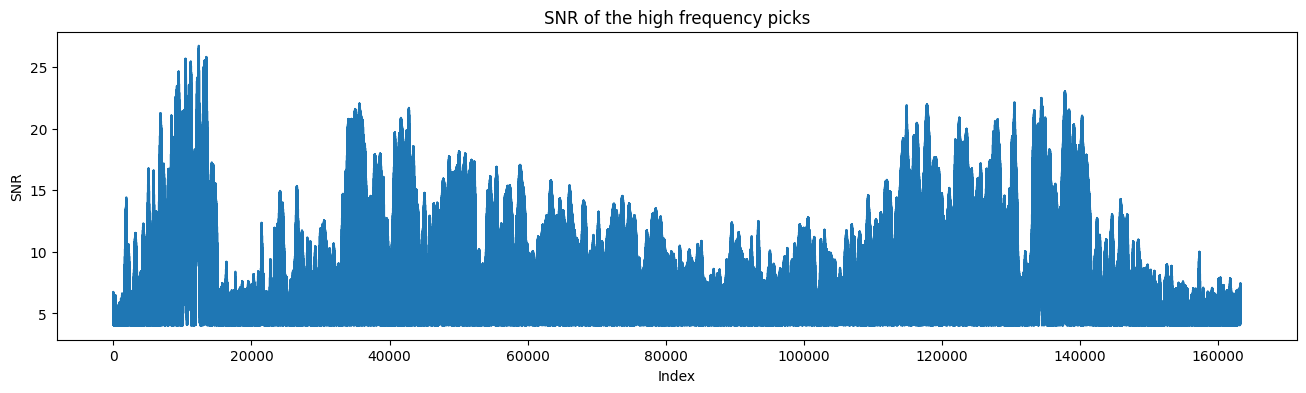

In [4]:
sizes = SNR_hf_north[tpicks_hf_north[0], tpicks_hf_north[1]]
print(np.shape(sizes))
print(np.shape(tpicks_hf_north))
print(np.shape(SNR_hf_north))

plt.figure(figsize=(16, 4))
plt.plot(sizes)
plt.title('SNR of the high frequency picks')
plt.xlabel('Index')
plt.ylabel('SNR')
plt.show()

In [5]:
# Group the picks by size
sizes = SNR_hf_north[tpicks_hf_north[0], tpicks_hf_north[1]]
print(f'Minimum of sizes: {np.min(sizes)}, maximum of sizes: {np.max(sizes)}')

max_size = 70
min_size = 1

# Scale the sizes to the range [0, 1] with a logarithmic scale
# sizes_scaled = min_size + (np.log(sizes) - np.log(np.min(sizes))) / (np.log(np.max(sizes)) - np.log(np.min(sizes))) * (max_size - min_size)
sizes_scaled = min_size + (sizes - np.min(sizes)) / (np.max(sizes) - np.min(sizes)) * (max_size - min_size)


Minimum of sizes: 4.000022941689153, maximum of sizes: 26.718775308372347


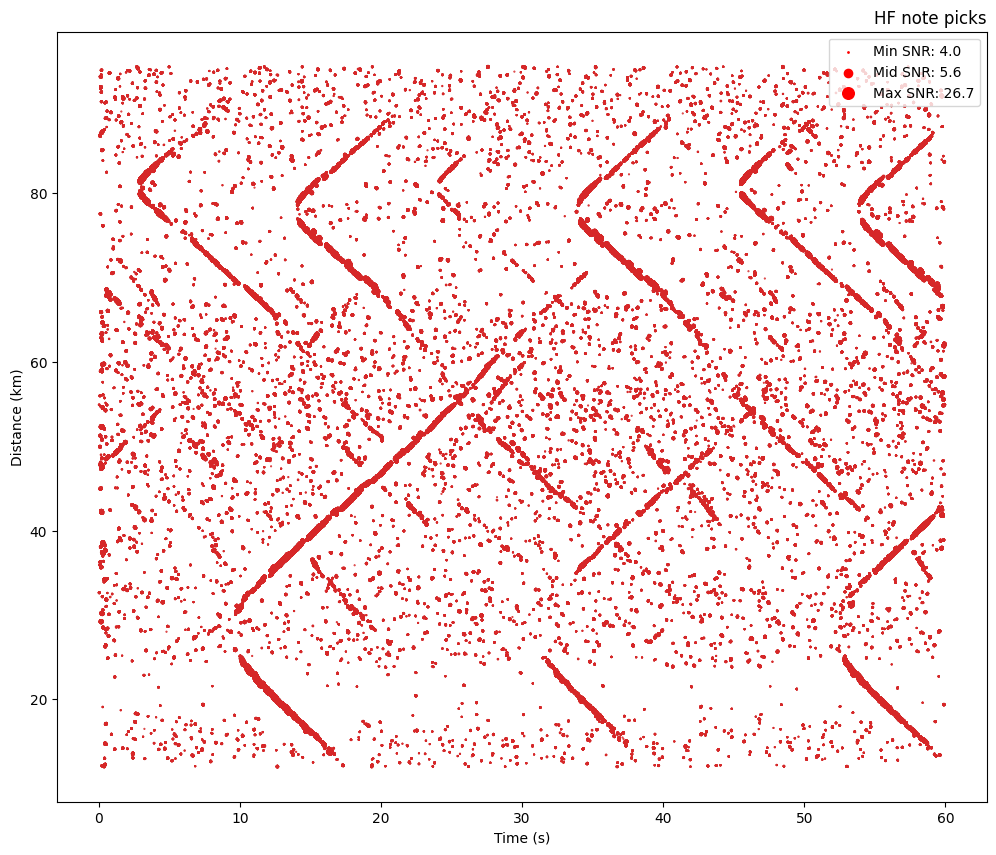

In [6]:
plt.figure(figsize=(12,10))
plt.scatter(tpicks_hf_north[1] / fs, (tpicks_hf_north[0] * selected_channels[2] + selected_channels[0]) * dx /1e3, color='tab:red', marker='.', s=sizes_scaled, rasterized=True)
plt.xlabel('Time (s)')

# Create a set of legend handles with different sizes
handles = [
    plt.scatter([], [], s=min(sizes_scaled), color='r', label=f'Min SNR: {sizes.min():.1f}'),
    plt.scatter([], [], s=(min(sizes_scaled) + max(sizes_scaled)) / 2, color='r', label=f'Mid SNR: {np.median(sizes):.1f}'),
    plt.scatter([], [], s=max(sizes_scaled), color='r', label=f'Max SNR: {sizes.max():.1f}')
]



plt.title('HF note picks', loc='right')
# Add legend to the plot
plt.legend(handles=handles, title="SNR Sizes", scatterpoints=1)

plt.ylabel('Distance (km)')
plt.legend(loc='upper right')
plt.show()